In [1]:
# Import libraries need for K-NN Model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get CSV file inside the python file
df=pd.read_csv('breast cancer.csv')

In [3]:
# Displaying the head, tail and shape of the CSV file
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
# Displays different information of the CSV file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# 'Unnamed: 32' column has NAN values for all the rows and can be neglected
df=df.drop(['Unnamed: 32'], axis=1)

In [6]:
# The number of rows were reduced to 32 columns
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
# Display of dataframe statistics
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
# Display null values
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# labels
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

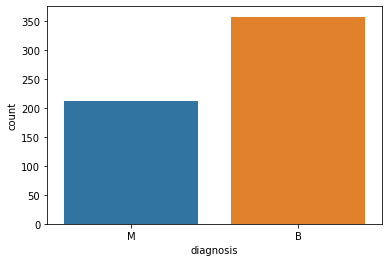

In [10]:
# Plat each class frequency
sns.countplot(x=df['diagnosis'],data=df)
plt.show()

In [11]:
# Using SelectKBest feature selection method
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [12]:
# Replace the label column into binary codes
df['diagnosis']=df['diagnosis'].replace({'M':1, 'B':0})

In [13]:
X=df.drop('diagnosis', axis=1)
y=df.diagnosis

In [14]:
best_features= SelectKBest(score_func=f_classif, k=17)
fit= best_features.fit(X,y)
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)

feature_scores=pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns= ['Feature_name', 'Score']
print (feature_scores.nlargest (17, 'Score'))

            Feature_name       Score
28  concave points_worst  964.385393
23       perimeter_worst  897.944219
8    concave points_mean  861.676020
21          radius_worst  860.781707
3         perimeter_mean  697.235272
24            area_worst  661.600206
1            radius_mean  646.981021
4              area_mean  573.060747
7         concavity_mean  533.793126
27       concavity_worst  436.691939
6       compactness_mean  313.233079
26     compactness_worst  304.341063
11             radius_se  268.840327
13          perimeter_se  253.897392
14               area_se  243.651586
22         texture_worst  149.596905
25      smoothness_worst  122.472880


In [15]:
new_X=df[['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean', 'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se', 'area_se', 'texture_worst', 'smoothness_worst']]

In [16]:
new_X

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,texture_worst,smoothness_worst
0,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,0.30010,0.27760,0.66560,1.0950,8.589,153.40,17.33,0.16220
1,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,0.08690,0.07864,0.18660,0.5435,3.398,74.08,23.41,0.12380
2,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,0.19740,0.15990,0.42450,0.7456,4.585,94.03,25.53,0.14440
3,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,0.24140,0.28390,0.86630,0.4956,3.445,27.23,26.50,0.20980
4,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,0.19800,0.13280,0.20500,0.7572,5.438,94.44,16.67,0.13740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,0.24390,0.11590,0.21130,1.1760,7.673,158.70,26.40,0.14100
565,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,0.14400,0.10340,0.19220,0.7655,5.203,99.04,38.25,0.11660
566,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,0.09251,0.10230,0.30940,0.4564,3.425,48.55,34.12,0.11390
567,0.2650,184.60,0.15200,25.740,140.10,1821.0,20.60,1265.0,0.35140,0.27700,0.86810,0.7260,5.772,86.22,39.42,0.16500


In [17]:
scalar= StandardScaler()
X_scaled=scalar.fit_transform(new_X)

In [18]:
X_scaled

array([[ 2.29607613,  2.30360062,  2.53247522, ...,  2.48757756,
        -1.35929347,  1.30768627],
       [ 1.0870843 ,  1.53512599,  0.54814416, ...,  0.74240195,
        -0.36920322, -0.37561196],
       [ 1.95500035,  1.34747521,  2.03723076, ...,  1.18133606,
        -0.02397438,  0.52740741],
       ...,
       [ 0.41406869,  0.57900058,  0.10577736, ...,  0.1806983 ,
         1.37485378, -0.80958728],
       [ 2.28998549,  2.30360062,  2.65886573, ...,  1.0095027 ,
         2.23792588,  1.43042677],
       [-1.74506282, -1.43273495, -1.26181958, ..., -0.46615196,
         0.76418957, -1.85901852]])

In [19]:
# Building model to train, test data
x_train,x_test,y_train,y_test=train_test_split(X_scaled, y, test_size=0.25, random_state=335)
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [20]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[95,  2],
       [ 0, 46]], dtype=int64)

In [21]:
print(classification_report(y_test,y_pred,digits=3))

              precision    recall  f1-score   support

           0      1.000     0.979     0.990        97
           1      0.958     1.000     0.979        46

    accuracy                          0.986       143
   macro avg      0.979     0.990     0.984       143
weighted avg      0.987     0.986     0.986       143



In [22]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid={'algorithm': ['kd_tree', 'brute'],
           'leaf_size': [3,5,6,7,8],
           'n_neighbors': [3,5,7,9,11,13]}

In [29]:
gridsearch= GridSearchCV(estimator=knn, param_grid=param_grid)

In [30]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [32]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 5}

In [34]:
# Implementing the Best parameteric combinations.
knn=KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=5)

In [35]:
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [36]:
 cfm=confusion_matrix(y_test,y_pred)
cfm

array([[95,  2],
       [ 0, 46]], dtype=int64)

In [37]:
print(classification_report(y_test,y_pred,digits=3))

              precision    recall  f1-score   support

           0      1.000     0.979     0.990        97
           1      0.958     1.000     0.979        46

    accuracy                          0.986       143
   macro avg      0.979     0.990     0.984       143
weighted avg      0.987     0.986     0.986       143

